In [1]:
import json
import requests as req
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import json

from census import Census
from us import states

# Save config information
api_key = "7824425f0ce43628c75b09e5bfc7c575e283699e"
url = "https://api.census.gov/data/"


In [51]:
# Pull data on businesses and number of establishments

years = ['2010', '2011', '2012', '2013', '2014', '2015']

# Query gets us Number of employees, establishments, size of establishments, year of data collected, annual pay, name of state, for each state
query = "EMP,EMPSZES,EMPSZES_TTL,ESTAB,YEAR,PAYANN,GEO_TTL&for=state:*"

cbp_df = pd.DataFrame()

for year in years: 
    # Build query URL
    query_url = url + year + "/cbp?get=" + query + "&key=" + api_key 

    # This should get us all establishments of employment in each state for the 2015 year.
    cbp_response = req.get(query_url)
    cbp_json = cbp_response.json()
    this_year_cbp = pd.DataFrame(cbp_json, columns =['EMP','EMPSZES','EMPSZES_TTL','ESTAB','YEAR','PAYANN','GEO_TTL','State'])
    
    cbp_df = cbp_df.append(this_year_cbp)

cbp_df.head()

,EMP,EMPSZES,EMPSZES_TTL,ESTAB,YEAR,PAYANN,GEO_TTL,State
0,EMP,EMPSZES,EMPSZES_TTL,ESTAB,YEAR,PAYANN,GEO_TTL,state
1,1568111,001,All establishments,99251,2010,57448016,Alabama,01
2,96042,212,Establishments with 1 to 4 employees,50113,2010,3262347,Alabama,01
3,138569,220,Establishments with 5 to 9 employees,20953,2010,4197349,Alabama,01
4,188244,230,Establishments with 10 to 19 employees,14005,2010,5912838,Alabama,01


In [134]:
clean_cbp = cbp_df.drop([0]).reset_index()
cbp_df = pd.DataFrame(clean_cbp, columns=['GEO_TTL','State','ESTAB','EMP','EMPSZES_TTL','PAYANN','YEAR'])
cbp_df

,GEO_TTL,State,ESTAB,EMP,EMPSZES_TTL,PAYANN,YEAR
0,Alabama,01,99251,1568111,All establishments,57448016,2010
1,Alabama,01,50113,96042,Establishments with 1 to 4 employees,3262347,2010
2,Alabama,01,20953,138569,Establishments with 5 to 9 employees,4197349,2010
3,Alabama,01,14005,188244,Establishments with 10 to 19 employees,5912838,2010
4,Alabama,01,9021,270606,Establishments with 20 to 49 employees,8808648,2010
5,Alabama,01,2824,194778,Establishments with 50 to 99 employees,6836604,2010
6,Alabama,01,1641,245705,Establishments with 100 to 249 employees,9228422,2010
7,Alabama,01,437,155187,Establishments with 250 to 499 employees,6301364,2010
8,Alabama,01,167,115231,Establishments with 500 to 999 employees,5028174,2010
9,Alabama,01,90,163749,"Establishments with 1,000 employees or more",7872270,2010


In [4]:
#Let's look at just DC for the past 5 years
DC_cbp_df = cbp_df.loc[cbp_df["GEO_TTL"] == "District of Columbia",:]
DC_cbp_df.head()

,GEO_TTL,State,ESTAB,EMP,EMPSZES_TTL,PAYANN,YEAR
80,District of Columbia,11,21502,463076,All establishments,30987176,2010
81,District of Columbia,11,10756,19722,Establishments with 1 to 4 employees,1613293,2010
82,District of Columbia,11,3992,26450,Establishments with 5 to 9 employees,1727571,2010
83,District of Columbia,11,2935,39495,Establishments with 10 to 19 employees,2447540,2010
84,District of Columbia,11,2206,67217,Establishments with 20 to 49 employees,4163103,2010


# Income and Poverty per State

In [10]:


# Save config information
api_key = Census("7824425f0ce43628c75b09e5bfc7c575e283699e", year=2015)


census_data = api_key.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population", 
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * census_pd["Unemployment Count"].astype(int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]

census_pd.head()

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,02,Alaska,733375.0,33.4,72515.0,33413.0,72957.0,9.948117,4.265894
1,01,Alabama,4830620.0,38.4,43623.0,24091.0,887260.0,18.367415,4.287172
2,05,Arkansas,2958208.0,37.7,41371.0,22798.0,553644.0,18.715520,3.547519
3,04,Arizona,6641928.0,36.8,50255.0,25848.0,1180690.0,17.776314,4.151084
4,06,California,38421464.0,35.8,61818.0,30318.0,6135142.0,15.968007,4.921939


In [44]:
#Create Brackets for different sizes of businesses 

small_size_biz_values = ["Establishments with 1 to 4 employees","Establishments with 5 to 9 employees",
                         "Establishments with 10 to 19 employees","Establishments with 20 to 49 employees",
                        "Establishments with 50 to 99 employees"]
med_size_biz_values = ["Establishments with 100 to 249 employees","Establishments with 250 to 499 employees",
                         "Establishments with 500 to 999 employees"]
large_size_biz_values = ["Establishments with 1,000 employees or more"]

#Create seperate data frames for each business size
small_biz= cbp_df[cbp_df.EMPSZES_TTL.isin(small_size_biz_values)]
small_biz= small_biz.reset_index(drop=True)

med_biz= cbp_df[cbp_df.EMPSZES_TTL.isin(med_size_biz_values)]
med_biz= med_biz.reset_index(drop=True)

large_biz= cbp_df[cbp_df.EMPSZES_TTL.isin(large_size_biz_values)]
large_biz= large_biz.reset_index(drop=True)



In [115]:
#Make columns in data frame ints
small_biz['ESTAB']=small_biz['ESTAB'].astype(int)
small_biz['EMP']=small_biz['EMP'].astype(int)
small_biz['PAYANN']=small_biz['PAYANN'].astype(int)

med_biz['ESTAB']=med_biz['ESTAB'].astype(int)
med_biz['EMP']=med_biz['EMP'].astype(int)
med_biz['PAYANN']=med_biz['PAYANN'].astype(int)

large_biz['ESTAB']=large_biz['ESTAB'].astype(int)
large_biz['EMP']=large_biz['EMP'].astype(int)
large_biz['PAYANN']=large_biz['PAYANN'].astype(int)

small_biz['ESTAB'].sum()

44159297

In [121]:
#GET ESTAB total for 2015 per business size 

small_biz_estab_total_2015 = small_biz.loc[small_biz['YEAR']=='2015']
small_biz_estab_total_2015 =small_biz_estab_total_2015.groupby('GEO_TTL').sum()['ESTAB']
small_biz_estab_sum_2015 =small_biz_estab_total_2015.sum()

med_biz_estab_total_2015 = med_biz.loc[med_biz['YEAR']=='2015']
med_biz_estab_total_2015 =med_biz_estab_total_2015.groupby('GEO_TTL').sum()['ESTAB']
med_biz_estab_sum_2015 =med_biz_estab_total_2015.sum()

large_biz_estab_total_2015 = large_biz.loc[large_biz['YEAR']=='2015']
large_biz_estab_sum_2015 =large_biz_estab_total_2015.groupby('GEO_TTL').sum()['ESTAB']

small_biz_estab_sum_2015

7528779

In [124]:
#Get Employee (EMP) Total for 2015 by business size
small_biz_emp_total_2015 = small_biz.loc[small_biz['YEAR']=='2015']
small_biz_emp_total_2015 =small_biz_emp_total_2015.groupby('GEO_TTL').sum()['EMP']
small_biz_emp_sum_2015 =small_biz_emp_total_2015.sum()

med_biz_emp_total_2015 = med_biz.loc[med_biz['YEAR']=='2015']
med_biz_emp_total_2015 =med_biz_emp_total_2015.groupby('GEO_TTL').sum()['EMP']
med_biz_emp_sum_2015 =med_biz_emp_total_2015.sum()

large_biz_emp_total_2015 = large_biz.loc[large_biz['YEAR']=='2015']
large_biz_emp_total_2015 =large_biz_emp_total_2015.groupby('GEO_TTL').sum()['EMP']
large_biz_emp_sum_2015 =large_biz_emp_total_2015.sum()

med_biz_pay_sum_2015

2208543974

In [107]:
#Get Annual Pay (PAYANN) Total for 2015 by business size
small_biz_pay_total_2015 = small_biz.loc[small_biz['YEAR']=='2015']
small_biz_pay_total_2015 =small_biz_pay_total_2015.groupby('GEO_TTL').sum()['PAYANN']
small_biz_pay_sum_2015 =small_biz_pay_total_2015.sum()

med_biz_pay_total_2015 = med_biz.loc[med_biz['YEAR']=='2015']
med_biz_pay_total_2015 =med_biz_pay_total_2015.groupby('GEO_TTL').sum()['PAYANN']
med_biz_pay_sum_2015 =med_biz_pay_total_2015.sum()

large_biz_pay_total_2015 = large_biz.loc[large_biz['YEAR']=='2015']
large_biz_pay_total_2015 =large_biz_pay_total_2015.groupby('GEO_TTL').sum()['PAYANN']
large_biz_pay_sum_2015 =large_biz_pay_total_2015.sum()


large_biz_pay_sum_2015

1232975168

In [125]:
large_biz_emp_sum_2015

18087835

In [126]:
x = (large_biz_pay_sum_2015/large_biz_emp_sum_2015)
x

68.16598935140662

#Convert Variables into DataFrame
small_biz_estab_total_2015_df = pd.DataFrame(small_biz_estab_total_2015)
med_biz_estab_total_2015_df = pd.DataFrame(med_biz_estab_total_2015)
large_biz_estab_total_2015_df = pd.DataFrame(large_biz_estab_total_2015)

small_biz_emp_total_2015_df = pd.DataFrame(small_biz_emp_total_2015)
med_biz_emp_total_2015_df = pd.DataFrame(med_biz_emp_total_2015)
large_biz_emp_total_2015_df = pd.DataFrame(large_biz_emp_total_2015)

small_biz_pay_total_2015_df = pd.DataFrame(small_biz_pay_total_2015)
med_biz_pay_total_2015_df = pd.DataFrame(med_biz_pay_total_2015)
large_biz_pay_total_2015_df = pd.DataFrame(large_biz_pay_total_2015)

med_biz_estab_total_2015_df.head()


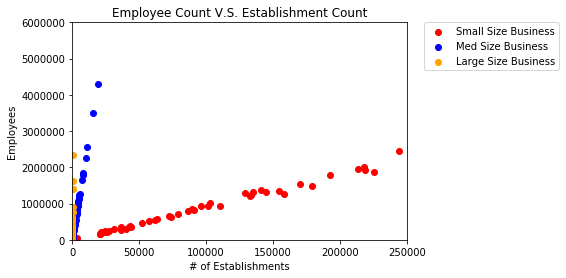

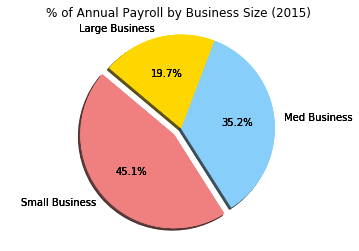

In [129]:
#Create Pie Chart for % of Annual Payroll by business size 

biz_size = ["Small Business", "Med Business","Large Business"]
pay_sums = [small_biz_pay_sum_2015, med_biz_pay_sum_2015, large_biz_pay_sum_2015]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0.1,0,0)
plt.pie(pay_sums, explode=explode, labels=biz_size, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Annual Payroll by Business Size (2015)")

plt.show()

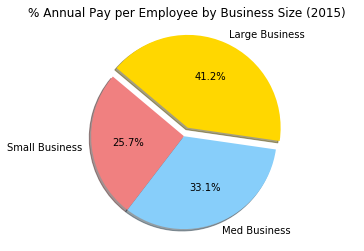

In [133]:
#Create Pie Chart for % of Annual Pay per employee by business type 
#Create Pie Chart for % of Annual Payroll by business size 

biz_size = ["Small Business", "Med Business","Large Business"]
pay_sums = [small_biz_pay_sum_2015/small_biz_emp_sum_2015, med_biz_pay_sum_2015/med_biz_emp_sum_2015,
            large_biz_pay_sum_2015/large_biz_emp_sum_2015]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0,0,0.1)
plt.pie(pay_sums, explode=explode, labels=biz_size, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% Annual Pay per Employee by Business Size (2015)")

plt.show()


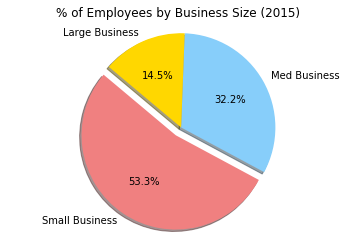

In [135]:
#Create Pie Chart for % of Employees by Business type 

biz_size = ["Small Business", "Med Business","Large Business"]
pay_sums = [small_biz_emp_sum_2015, med_biz_emp_sum_2015, large_biz_emp_sum_2015]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0.1,0,0)
plt.pie(pay_sums, explode=explode, labels=biz_size, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Employees by Business Size (2015)")

plt.show()

In [27]:
#Drop U.S. Territories, only show States 
small_biz_estab_total_2015_df = small_biz_estab_total_2015_df.drop(['Commonwealth of the Northern Mariana Islands','American Samoa',
                                    'United States Virgin Islands','Guam'])


In [28]:
small_biz_estab_total_2015_df

,ESTAB
GEO_TTL,
Alabama,96098
Alaska,20510
Arizona,132892
Arkansas,63755
California,887658
Colorado,158519
Connecticut,86904
Delaware,24270
District of Columbia,21681
